In [2]:
#Name: Vidhi Ashok Palan
#CWID: 20031836
#Model: Decision Tree


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# Load dataset
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')




In [5]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

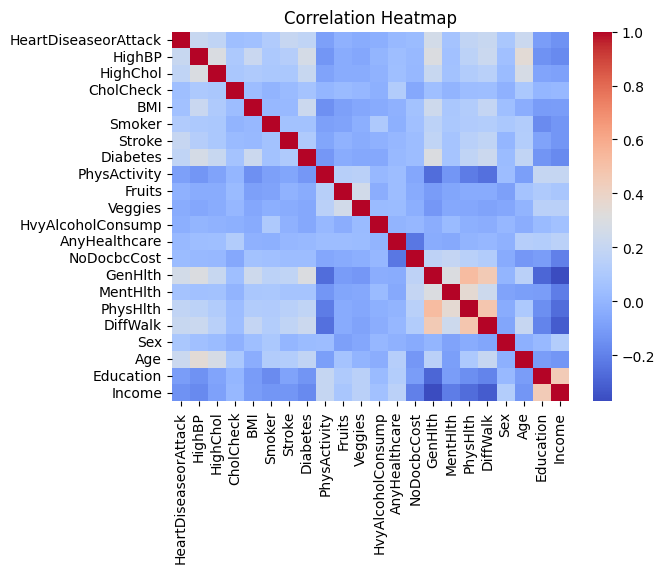

In [6]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


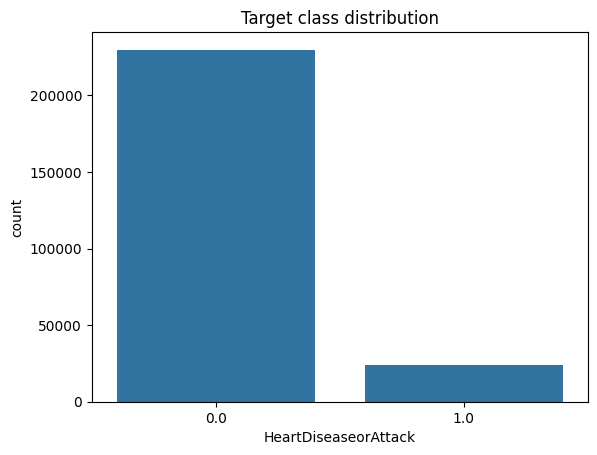

In [7]:
# Missing values
print(df.isnull().sum())

# Class distribution
sns.countplot(data=df, x='HeartDiseaseorAttack')
plt.title("Target class distribution")
plt.show()


In [8]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Base Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Base Decision Tree
Accuracy: 0.8507305792074004
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     68936
         1.0       0.24      0.28      0.26      7168

    accuracy                           0.85     76104
   macro avg       0.58      0.59      0.59     76104
weighted avg       0.86      0.85      0.86     76104



In [10]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Parameters:", grid_dt.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [11]:
best_dt = grid_dt.best_estimator_
y_pred_tuned = best_dt.predict(X_test)

print("Tuned Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Tuned Decision Tree
Accuracy: 0.9068642909702512
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     68936
         1.0       0.55      0.07      0.12      7168

    accuracy                           0.91     76104
   macro avg       0.73      0.53      0.53     76104
weighted avg       0.88      0.91      0.87     76104



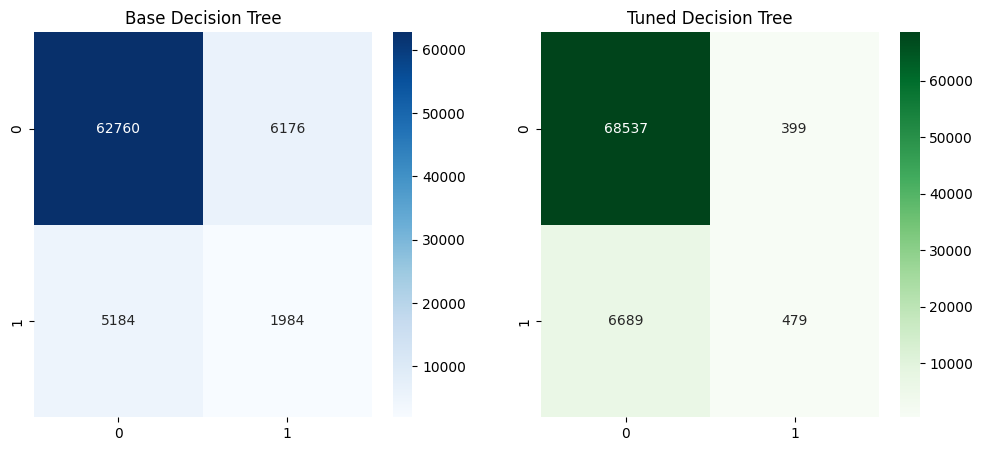

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Base Decision Tree')

sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Decision Tree')

plt.show()


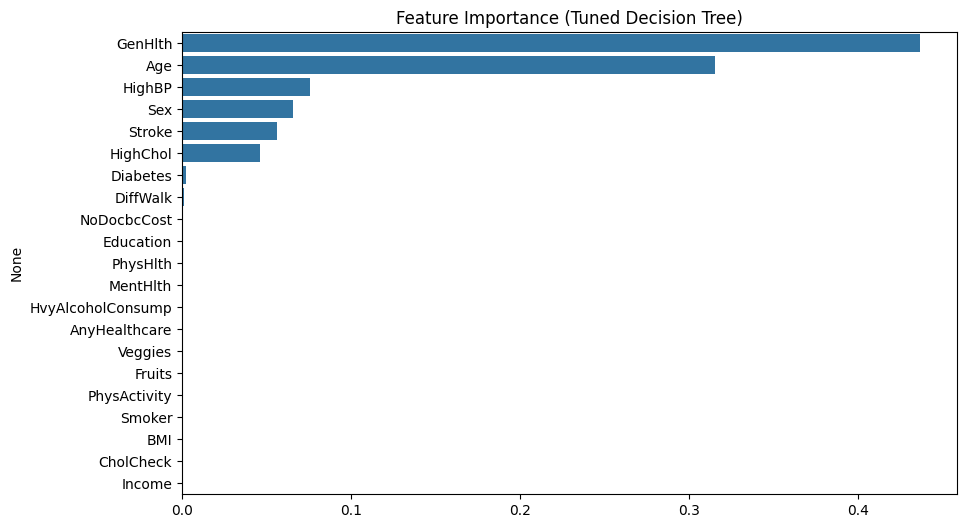

In [13]:
importances = best_dt.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Tuned Decision Tree)")
plt.show()


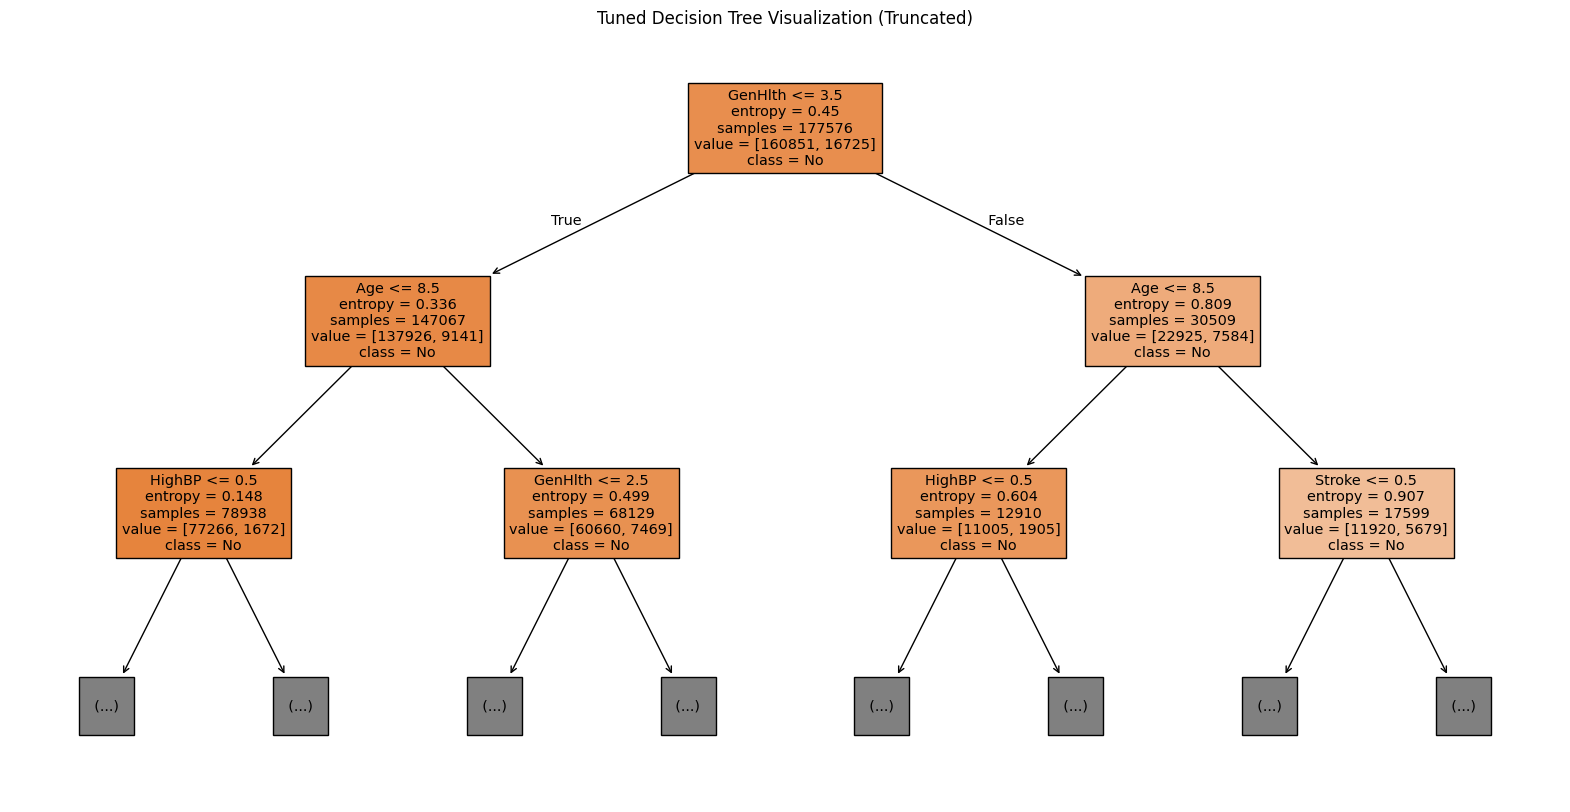

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=["No", "Yes"], filled=True, max_depth=2)
plt.title("Tuned Decision Tree Visualization (Truncated)")
plt.show()


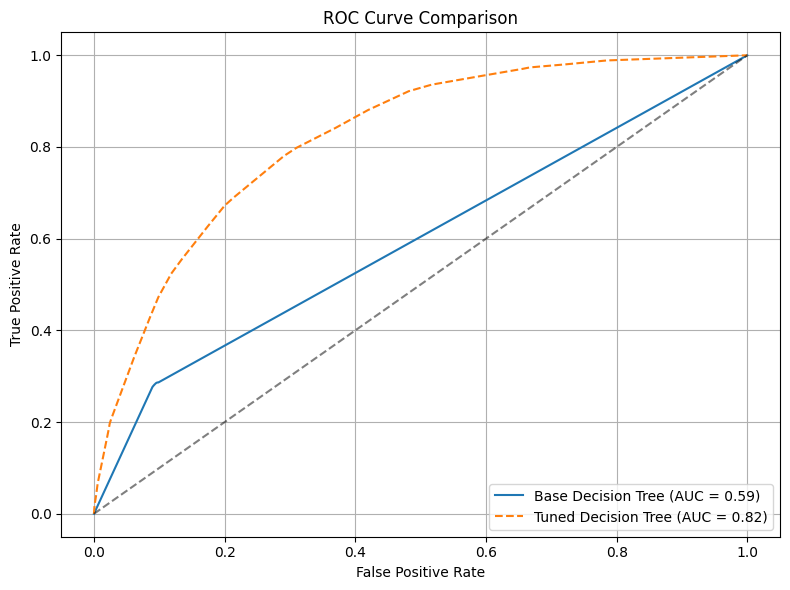

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
base_probs = dt.predict_proba(X_test)[:, 1]
tuned_probs = best_dt.predict_proba(X_test)[:, 1]

# ROC curves
fpr_base, tpr_base, _ = roc_curve(y_test, base_probs)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, tuned_probs)

# AUC scores
auc_base = roc_auc_score(y_test, base_probs)
auc_tuned = roc_auc_score(y_test, tuned_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f'Base Decision Tree (AUC = {auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Decision Tree (AUC = {auc_tuned:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

# Base Decision Tree accuracy
base_accuracy = accuracy_score(y_test, y_pred)
print(f"Base Decision Tree Accuracy: {base_accuracy:.4f}")

# Tuned Decision Tree accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Decision Tree Accuracy: {tuned_accuracy:.4f}")

# Optional: Print difference
improvement = tuned_accuracy - base_accuracy
print(f"Accuracy Improvement: {improvement:.4f}")


Base Decision Tree Accuracy: 0.8507
Tuned Decision Tree Accuracy: 0.9069
Accuracy Improvement: 0.0561


In [17]:
import joblib
joblib.dump(best_dt, 'tuned_decision_tree.pkl')
print("Tuned Decision Tree saved as tuned_decision_tree.pkl")


Tuned Decision Tree saved as tuned_decision_tree.pkl


In [18]:
print("Number of features used to train the model:", X_train.shape[1])
print("Feature names:")
print(X_train.columns.tolist())


Number of features used to train the model: 21
Feature names:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
